In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import os

In [3]:
tf.__version__

'2.8.0'

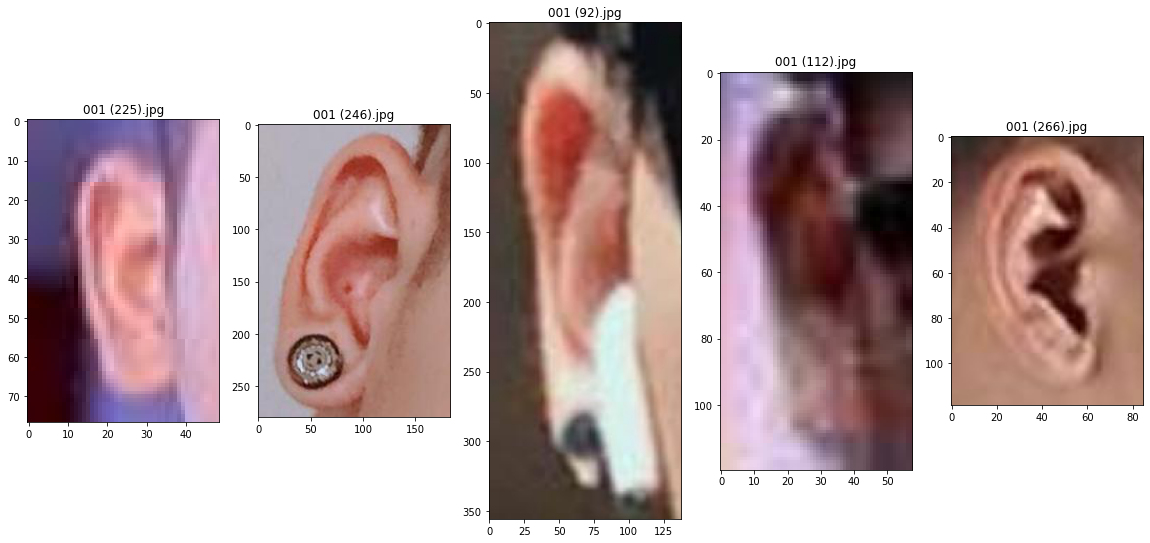

In [4]:
plt.figure(figsize=(20,20))
test_folder="../../../Dataset/EarVN1.0 dataset/split_dataset/train/001.ALI_HD/"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
CATE_DATASET_PATH = "../../../Dataset/EarVN1.0 dataset/split_dataset/train/"
categories = os.listdir(CATE_DATASET_PATH)
print(len(categories))

164


In [6]:
import pandas as pd

def get_data_info(path):
    categories = os.listdir(path)
    df_categories = []
    df_categories_image_number = []
    for cate in categories:
        df_categories.append(cate)
        image_num = len(os.listdir(os.path.join(path, cate)))
        df_categories_image_number.append(image_num)
        
    df = pd.DataFrame()
    df["category"] = df_categories
    df["image_num"] = df_categories_image_number
    return df

In [7]:
info = get_data_info(CATE_DATASET_PATH)
info

,category,image_num
0,016.Dang_L,133
1,015.Dan_Trg,164
2,094.Tuan_Hu,134
3,022.Duy_Kh,162
4,119.Kim_Ph,126
...,...,...
159,002.LeDuong_BL,239
160,075.Rym,132
161,122.La_Thanh_H,127
162,081.Thanh_D,137


In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(100, 200))
ax = sns.barplot(x="image_num", y="category", data=info)

In [9]:
info.max()

category     164.Yen_Nhi_H
image_num              239
dtype: object

In [10]:
info.min()

category     001.ALI_HD
image_num            90
dtype: object

In [11]:
info[info['image_num'] < MAX]['category']

NameError: name 'MAX' is not defined

In [12]:
info = get_data_info(AUG_DATASET_PATH)
info

NameError: name 'AUG_DATASET_PATH' is not defined

In [59]:
info[info['image_num'] < MAX]['category']

0          016.Dang_L
1         015.Dan_Trg
2         094.Tuan_Hu
3          022.Duy_Kh
4          119.Kim_Ph
            ...      
159    002.LeDuong_BL
160           075.Rym
161    122.La_Thanh_H
162       081.Thanh_D
163    029.Ho_Trung_D
Name: category, Length: 164, dtype: object

In [17]:
MAX = 600
cate_not_max = info[info['image_num'] < MAX]['category']

In [18]:
cate_not_max

0          016.Dang_L
1         015.Dan_Trg
2         094.Tuan_Hu
3          022.Duy_Kh
4          119.Kim_Ph
            ...      
159    002.LeDuong_BL
160           075.Rym
161    122.La_Thanh_H
162       081.Thanh_D
163    029.Ho_Trung_D
Name: category, Length: 164, dtype: object

In [19]:
from skimage import io, exposure
from skimage.transform import rotate
from skimage.util import random_noise
import scipy.ndimage as ndi
from skimage.exposure import adjust_gamma
from skimage import img_as_ubyte
import numpy as np

# random rotation
# blur 20%
# Gaussian noise
# brightness
# flipped horizontally

def augment(image_path):
    img = io.imread(image_path)
    
    #rotation (-15, 15)
    rotate(img, random.randint(-15,15), mode="edge")
    
    if random.uniform(0, 1) < 0.2:
        alpha = random.randint(0,5)
        img = ndi.uniform_filter(img, size=(alpha, alpha, 1))
    
    var_noise = random.randint(1,5) * 0.0001
    img = random_noise(img, var=var_noise)
    
    brightness_param = random.uniform(0.8, 1.3)
    img = adjust_gamma(img, brightness_param)
    
    if random.uniform(0, 1) < 0.5:
        img= np.fliplr(img)
    
    return img
    

In [20]:
%%capture
from tqdm import tqdm_notebook as tqdm
import time
tqdm().pandas()

In [21]:
MAX

600

In [ ]:
AUG_DATASET_PATH = "../../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/"

with tqdm(total=len(cate_not_max), desc ="Augmentation") as pbar:
    for cate in cate_not_max:
        path = os.path.join(CATE_DATASET_PATH, cate)
        img_num = info[info['category'] == cate]['image_num'].values[0]
        # need_fill = MAX - img_num
        
        # print(MAX)
        
        # breakx
        print(path)
        for idx in range(img_num + 1, MAX + 1):
            print(idx, MAX)
            image_name = random.choice(os.listdir(path))
            image_path = os.path.join(CATE_DATASET_PATH, cate, image_name)
            image_aug = augment(image_path)

            image_aug_name = cate[0:3] + " " + "(" + str(idx) + ")" + ".jpg"

            image_aug_path = os.path.join(AUG_DATASET_PATH, cate, image_aug_name)
            io.imsave(image_aug_path, img_as_ubyte(image_aug))
        
        pbar.update(1)
        

In [74]:
AUG_DATASET_PATH = "../../../Dataset/EarVN1.0 dataset/aug_dataset_600/train/"

In [23]:
info = get_data_info(AUG_DATASET_PATH)
info

,category,image_num
0,016.Dang_L,575
1,015.Dan_Trg,569
2,094.Tuan_Hu,575
3,022.Duy_Kh,568
4,119.Kim_Ph,569
...,...,...
159,002.LeDuong_BL,548
160,075.Rym,578
161,122.La_Thanh_H,573
162,081.Thanh_D,575


In [65]:
random.choice(os.listdir(test_folder))

'001 (5).jpg'

In [49]:
info[info['category'] == "002.LeDuong_BL"]['image_num'].values[0]

248

In [168]:
info[info['image_num'] == 300]['category'].values[0][0:3]

'002'

In [75]:
info[info['category'] == '002.LeDuong_BL']['image_num'].values[0]

300

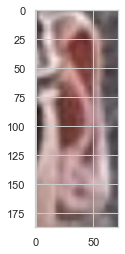

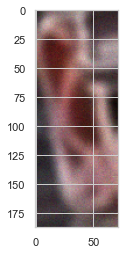

In [161]:
from skimage import io, exposure
from skimage.transform import rotate
from skimage.util import random_noise
import scipy.ndimage as ndi
from skimage.exposure import adjust_gamma
import numpy as np

test_folder="../../../Dataset/EarVN1.0 dataset/split_dataset/train/001.ALI_HD/001 (5).jpg"
img = io.imread(test_folder)
plt.imshow(img)
plt.show()
img = rotate(img, -15, mode="edge")
img = ndi.uniform_filter(img, size=(10, 10, 1))
img = random_noise(img, var=0.0009)
img = adjust_gamma(img, 1.5)
img = exposure.rescale_intensity(img)
img= np.fliplr(img)
plt.imshow(img)

In [153]:
random.uniform(0, 1)

0.2420167319588873

In [21]:
if random.uniform(0, 1) < 0.2:
    print("e")